In [77]:
import pandas as pd
import numpy as np

# **Importing DataSets**

In [78]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [79]:
train.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,M,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,Y,1
1,2,M,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,Y,1
2,3,M,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,N,0
3,4,F,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,N,0
4,5,F,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,N,0


# **Knowing Data**

In [80]:
train.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [81]:
train.smoking.value_counts()

0    25256
1    14744
Name: smoking, dtype: int64

In [82]:
train.gender.value_counts()

M    25403
F    14597
Name: gender, dtype: int64

In [83]:
train.oral.value_counts()

Y    40000
Name: oral, dtype: int64

In [84]:
train.tartar.value_counts()

Y    22207
N    17793
Name: tartar, dtype: int64

# **Label Encoding**

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['gender'] = label_encoder.fit_transform(train['gender'])
train['tartar'] = label_encoder.fit_transform(train['tartar'])
train.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,1,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,1,1
1,2,1,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,1,1
2,3,1,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,0,0
3,4,0,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,0,0
4,5,0,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,0,0


In [86]:
train.drop('oral',axis=1,inplace=True)

# **Data Visualisation**

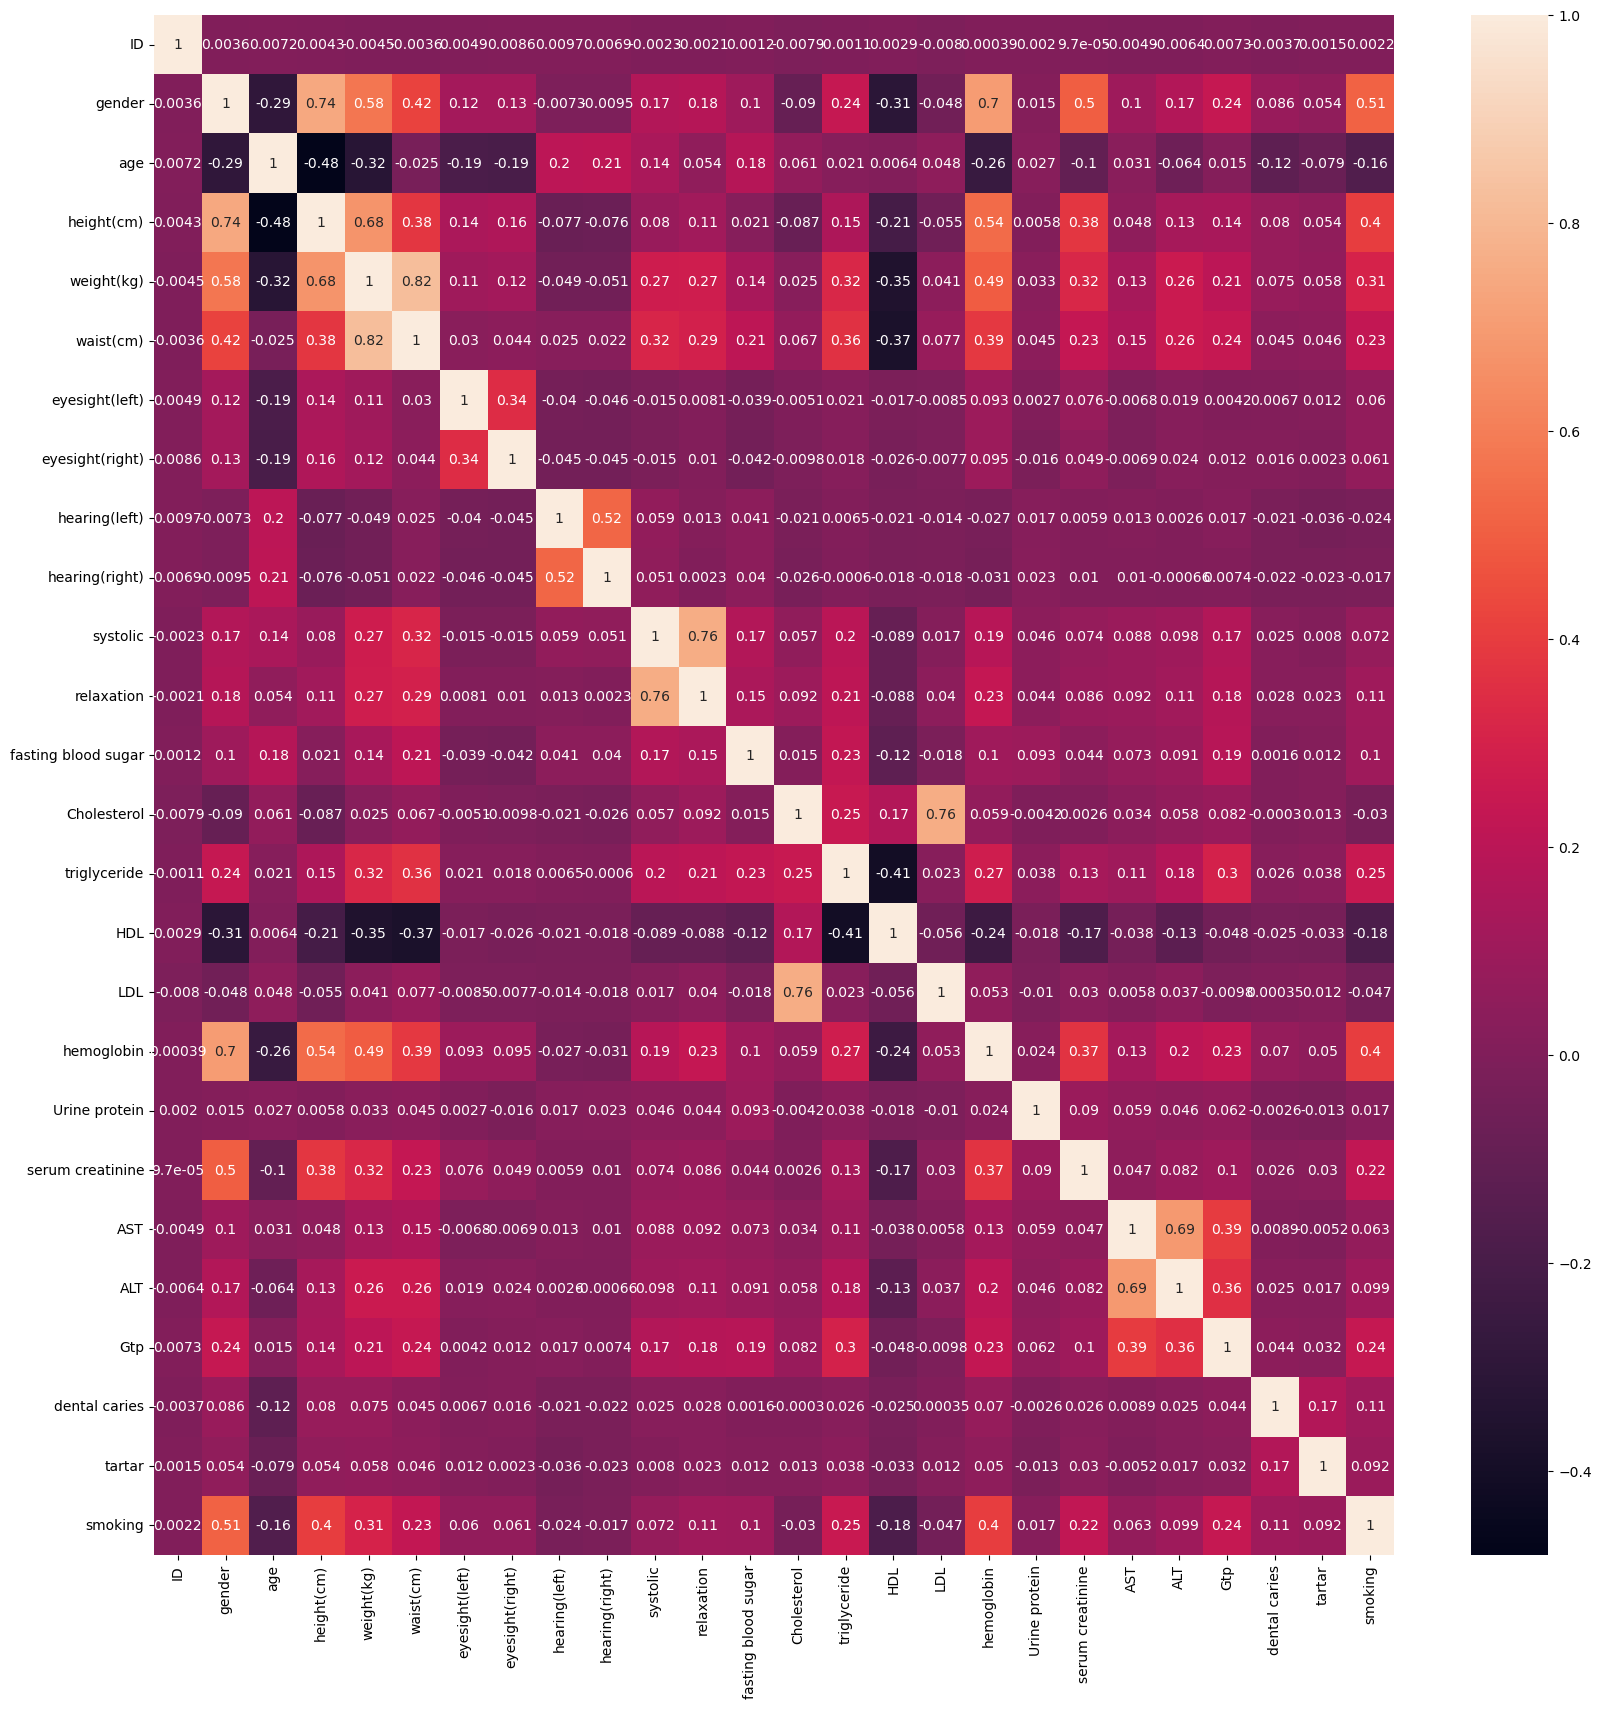

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cor = train.corr()
sns.heatmap(cor,annot=True);

# Splitting into independent and dependent datasets

In [88]:
X = train.drop(['ID','smoking'],axis=1)
y = train.smoking

In [89]:
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,1,70,175,65,89.8,0.8,1.0,1,1,125,...,43,64,15.5,5,1.3,29,18,53,0,1
1,1,40,170,65,86.0,1.2,1.0,1,1,110,...,56,120,15.3,1,1.2,26,23,21,1,1
2,1,20,170,70,83.0,1.0,1.0,1,1,125,...,53,90,14.2,1,1.0,17,11,12,0,0
3,0,60,145,50,77.0,0.4,0.5,1,2,123,...,43,165,12.8,1,0.5,26,12,13,0,0
4,0,40,160,70,82.9,0.9,0.7,1,1,119,...,64,139,13.8,1,0.9,16,25,20,0,0


# **Creating a model and tuning the model**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

np.random.seed(42)

#Splitting the training dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiating the model
clf = RandomForestClassifier()

#Fit the model
clf.fit(X_train,y_train)

#Predictions
y_preds = clf.predict(X_test)

# Function for evaluating the model

In [91]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Baseline Metrics

In [92]:
baseline_metrics = evaluate_preds(y_test,y_preds)
baseline_metrics

Acc: 81.53%
Precision: 0.73
Recall: 0.77
F1 score: 0.75


{'accuracy': 0.82, 'precision': 0.73, 'recall': 0.77, 'f1': 0.75}

# **GridSearchCV**

In [93]:
"""from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators':[400,600,800],'max_depth':[None],
        "max_features":['sqrt','log2'],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantisate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

#fit the randomisedSearchCv version of clf
gs_clf.fit(X_train,y_train)"""

'from sklearn.model_selection import GridSearchCV\n\ngrid_2 = {\'n_estimators\':[400,600,800],\'max_depth\':[None],\n        "max_features":[\'sqrt\',\'log2\'],\n        "min_samples_split":[6],\n        "min_samples_leaf":[1,2]}\n\nX_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)\n\n#Instantisate the RandomForestClassifier\nclf = RandomForestClassifier(n_jobs=1)\n\n#Setup GridSearchCV\ngs_clf = GridSearchCV(estimator=clf,\n                            param_grid=grid_2,\n                            cv=5,\n                            verbose=2)\n\n#fit the randomisedSearchCv version of clf\ngs_clf.fit(X_train,y_train)'

In [94]:
#gs_clf.best_params_

In [95]:
#preds = gs_clf.predict(X_test)
#evaluate_preds(y_test,preds)

# **Test DataSet - PreProcessing**

In [96]:
test.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
dtype: int64

In [97]:
test.drop(['ID','oral'],axis=1,inplace=True)

In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test['gender'] = label_encoder.fit_transform(test['gender'])
test['tartar'] = label_encoder.fit_transform(test['tartar'])
test.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,45,155,55,78.0,0.8,1.2,1,1,132,...,66,72,13.6,1,0.7,19,17,24,1,0
1,0,40,160,55,74.0,0.9,0.9,1,1,107,...,113,114,14.7,1,0.9,32,22,8,0,1
2,1,40,175,85,97.0,1.5,1.0,1,1,120,...,54,97,14.7,1,0.7,20,29,62,0,1
3,1,60,160,50,72.0,1.0,1.2,1,1,97,...,74,107,14.7,1,0.9,22,14,28,0,0
4,0,50,160,65,88.1,0.7,0.8,1,1,137,...,47,155,13.9,1,0.9,36,62,40,0,0


# Accuracy

In [99]:
np.random.seed(42)
clf_new = RandomForestClassifier(max_features='log2',max_depth=None,min_samples_leaf=1,min_samples_split=6,n_estimators=600)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf_new.fit(X_train,y_train)

pred = clf_new.predict(X_test)
evaluate_preds(y_test,pred)

Acc: 81.70%
Precision: 0.73
Recall: 0.79
F1 score: 0.76


{'accuracy': 0.82, 'precision': 0.73, 'recall': 0.79, 'f1': 0.76}

In [100]:
test.shape

(15692, 24)

# **Final Predictions on test dataset**

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf_new = RandomForestClassifier(max_features='log2',max_depth=None,min_samples_leaf=1,min_samples_split=6,n_estimators=600)

clf_new.fit(X,y)
y_preds = clf_new.predict(test)
y_preds

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [102]:
import pickle
pickle_out = open("smoking.pkl","wb")
pickle.dump(clf_new,pickle_out)
pickle_out.close()